In [3]:
import numpy as np
import matplotlib.pyplot as plt

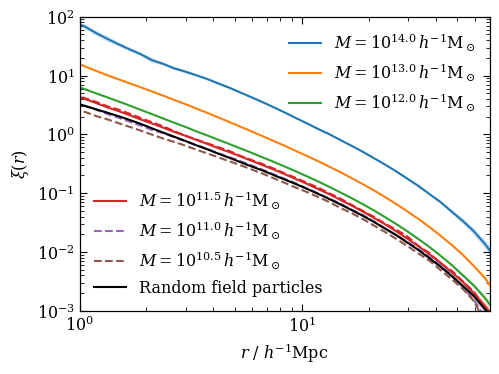

In [8]:
# set font
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# initialize subplots
f, ax = plt.subplots(1,1, figsize=(5,3.5)) 
ax2 = ax.twinx()
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0, top = 0.97, bottom = 0.13, right = 0.96, left = 0.14)

# plot the base resolution clustering
# the files contain columns with the clustering of all 25 boxes. Plots the average of these
path = 'data/clustering/'
masses = 14, 13, 12, 11.5
for i in range(len(masses)):
    xi = [None]*25
    for j in range(25):
        data = np.loadtxt(path+'xi_haloes_base_M%.1f.txt'%masses[i])
        r = data[:,0]
        xi[j] = data[:,j+1]
    std = np.std(xi, axis=0)
    xi = np.mean(xi, axis=0)

    ax.fill_between(r, xi-std, xi+std, alpha=0.2)
    label=r'$M = 10^{%.1f} \, h^{-1}\mathrm{M}_\odot$'%masses[i]
    if i>2: label=None
    ax.plot(r, xi, label=label, c="C%i"%i)

    
# plot the high resolution clustering
masses = 11.5, 11, 10.5
for i in range(len(masses)):
    r,_,xi = np.loadtxt(path+'xi_haloes_high_M%.1f.txt'%masses[i])
    ax.plot(r, xi, c="C%i"%(i+3), ls="--")

    
# plot the clustering of the field particles
data = np.loadtxt(path+'xi_particles.txt')
r, xis = data[:,0], data[:,1:]
std = np.std(xis, axis=1)
xi = np.mean(xis, axis=1)

ax.fill_between(r, xi-std, xi+std, alpha=0.2, facecolor="k")
ax.plot(r, xi, c="k")


# set legends, axis limits and labels
ax2.plot([],[],c="C3", label=r'$M = 10^{%.1f} \, h^{-1}\mathrm{M}_\odot$'%(11.5))
ax2.plot([],[],c="C4", ls="--", label=r'$M = 10^{%.1f} \, h^{-1}\mathrm{M}_\odot$'%(11))
ax2.plot([],[],c="C5", ls="--", label=r'$M = 10^{%.1f} \, h^{-1}\mathrm{M}_\odot$'%(10.5))
ax2.plot([],[],c="k", label="Random field particles")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e0, 70)
ax.set_ylim(1e-3, 1e2)
ax.tick_params(direction="in", top=True, right=True, length=5, labelsize=11.5)
ax.tick_params(which="minor", direction="in", top=True, right=True, length=3, labelsize=11.5)
ax.set_xlabel(r"$r \ / \ h^{-1}\mathrm{Mpc}$", fontsize=11.5)
ax.set_ylabel(r"$\xi(r)$", fontsize=11.5)

ax.legend(loc="upper right", fontsize=11.5).draw_frame(False)
ax2.legend(loc="lower left", fontsize=11.5).draw_frame(False)

plt.savefig("pdf/Figure_3.pdf", dpi=300)